# Optimize with SciPy

Say hello to [SciPy](https://www.scipy.org/), a powerful library used for mathematics in Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## 1. Local Optimization

In our previous exercice, we saw the importance of finding the minimum of a given function - for instance, `RMSE = f(intercept_coef, slope_coef)`, and the two main approaches possible: iterative approaches (such as gradient descent) and closed-formed (such as matrix inversion).

Let's discover [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) library to find the **local** minimium of a function in a few lines of code

In [2]:
import scipy
import scipy.optimize

### 1.1 1D-function

In [3]:
# Suppose a given function f
def f(x):
    return (x**2 - 20 * np.cos(x))

❓ Plot it below between -10 and +10

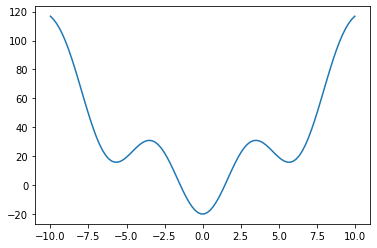

In [4]:
f_range = np.linspace(-10, 10, 100)
y_values = np.array([f(xi) for xi in f_range])
plt.plot(f_range, y_values)

❓ Find the local minimum of f, from a starting point X0

In [5]:
from scipy import optimize
bounds = [(-10, 10)]
test = optimize.minimize(f, -10)
test

      fun: -20.0
 hess_inv: array([[0.04545452]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 12
   status: 0
  success: True
        x: array([-5.66896909e-09])

❓ Notice the minimum found in variable `x`, and the number of iterations it took to converge: `nint`. What can you conclude?  
Try to change the `x0`!

<details>
    <summary>👉 Explanations</summary>
After <code>nint</code> iterations, the algorithm of the <code>minimize()</code> function gets stuck on a local minimum <code>x</code>, except if it starts from values of <code>x0</code> close enough to the global minimum (0). The value of the local minimum found is <code>fun</code>
    
In math, we say that this function is not [convex](https://en.wikipedia.org/wiki/Convex_function). If it were convex, any minimum would be the global minimum! In fact, machine-learning loves convexity, and such problems are very easy to solve with iterative processes such as gradient descent.
</details>


### 1.2 2D-function

As we saw in previous exercice, finding the minimum of a function with more than one parameter becomes rapidly complex. Let's try out:

In [6]:
def g(X):
    return -(X[1] + 47) * np.sin(np.sqrt(abs(X[0]/2 + (X[1]  + 47))))-X[0] * np.sin(np.sqrt(abs(X[0] - (X[1]  + 47))))

Run the cell below to visualize `g` in 3D

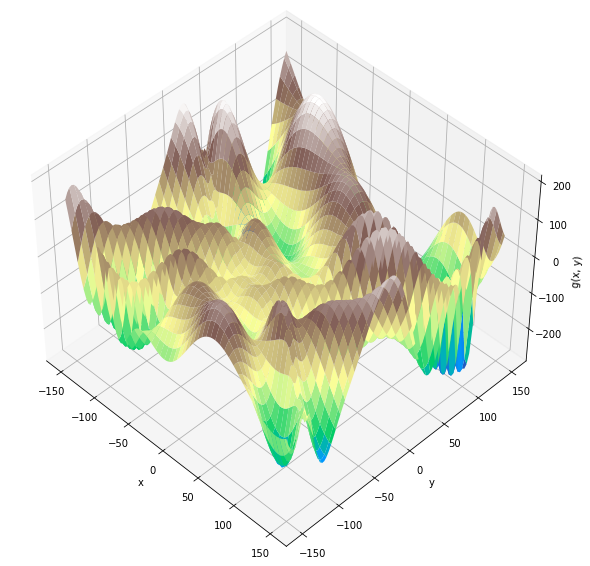

In [7]:
# Build a (50*50) meshgrid
x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx, yy]) # (2, 100, 100)

# Compute Z, a 2D-array containing g(x,y) for each (x,y) in the meshgrid
Z = g(zz)

# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, cmap='terrain')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('g(x, y)'); ax.view_init(45, -45);
plt.show()

❓Initialize a starting point X0

In [8]:
X0 = [10, 10]

❓Find a minima using `scipy.optimize.minimize()`

In [9]:
optimize.minimize(g, X0)

      fun: -66.84371732944217
 hess_inv: array([[ 6.7680013 , -1.16567521],
       [-1.16567521,  3.57874734]])
      jac: array([-1.90734863e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 8.4569232 , 15.65091066])

❓Does this look like the absolute minimum? Check it out using the plot below

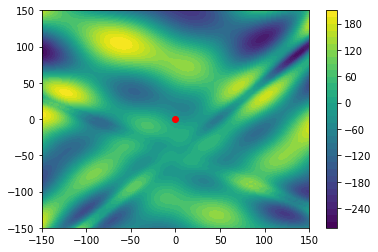

In [10]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(0, 0, c='r')

You probably only found a **local** minimum to your objective function f, given a starting point $X0$.

❓ Can you think of a procedure that would increase your chance of finding the **global** minima?

In [11]:
# Iterate over various well spread X0, build a list, find the min of the list

<details>
    <summary>💡Hints</summary>

👉 One empirical idea is to loop over lots of random starting points $X0$, and store the minimum value found at each run. After each iteration, you increase your chance of finding the global minimum (if there is any).

### 1.3 Minimize under constraint 🔥

In a real world problems, we often want to minimize a function $h(\textbf{x})$, **given a set of constraints on the values of $\textbf{x}$ itself**.   

See for instance, the famous [Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem) 🎒

As often in Math, the hardest part is not to solve the equations but to convert your real-world problem into mathematical equations. But for the sake of this challenge, let's assume we came with the following problem statement:

---
Find $\textbf{x}$ that minimizes $h(\textbf{x}) = x_1 x_4 (x_1 + x_2 + x_3) + x_3$  

Given the following constraints


$[1]\ \ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$  (*equality constraint*)

$[2]\ \ x_1 x_2 x_3 x_4 \leqslant 25$ (*inequality constraint*)

$[3]\ \ 1 \leqslant x_1, x_2, x_3, x_4 \leqslant 5$ (*bounds*)

--- 

❓ Re-use the `minimize` method to find a local minimum using additional arguments as follows: 

`optimize.minimize(h, X0, constraints=cons, bounds=boundaries)`

In [12]:
# Define your objective function h(X) that you want to minimize, X being a 1D-array of lenght 4
def h(X):
    return (X[0] * X[3] * (X[0] + X[1] + X[2]) + X[2])

In [23]:
# Define a function constraint1(X) that returns 0 if and only if equation [1] is True
def constraint1(X):
    if X[0]**2 + X[1]**2 + X[2]**2 + X[3]**2 - 40 == 0:
        return X[0]**2 + X[1]**2 + X[2]**2 + X[3]**2 - 40
    return 100

# Define a function constraint2(X) that returns a strictly positive number if and only if equation [2] is True
def constraint2(X):
    if (X[0] * X[1] * X[2] * X[3]) - 25 <= 0:
        return 1
    return -100

We'll now define for you the "constraint" argument needed for the minimize function. Pay attention to the scipy syntax:

In [24]:
con1 = {"type": "eq", "fun": constraint1}
con2 = {"type": "ineq", "fun": constraint2}
cons = [con1, con2]

❓ Let's deal with equation [3].
We could write them in the form of 10 constraints functions, but it would be long  
Instead, scipy allows to create "boundaries" arguments for the variables we look for, in the following form:  
`bounds` = tuple of tuple `((x1_min, x_1_max), (x2_min, x_2_max), ....)`

In [25]:
# Create bounds
boundaries = ((1, 5), (1, 5), (1, 5), (1, 5))

In [28]:
# Finally, define a any starting point X0 for the minimization algorithm
X0 =np.array([1, 1, 1, 1])
X0.shape

(4,)

❓ Now, try to find the minimum of your objective function `f` under such constraints using `optimize.minimize`

In [29]:
# Minimize under constraints
optimize.minimize(h, X0, constraints=cons, bounds=boundaries)

     fun: 4.0
     jac: array([4., 1., 2., 3.])
 message: 'Singular matrix C in LSQ subproblem'
    nfev: 5
     nit: 1
    njev: 1
  status: 6
 success: False
       x: array([1., 1., 1., 1.])

## 2. Global Optimization

As discussed, `scipy.optimize.minimize` only finds for the **local minima in viscinity of X0**. To find the **global** minima, you have basically two options:

1. Prove mathematically that your optimization problem is geometrically [convex](https://en.wikipedia.org/wiki/Convex_function). An optimization problem is convex in the following case: (i) its objective function `h` is a convex function, (ii) the inequality constraints are convex, and (iii) the equality constraints are affine. Read in this excellent math-based presentation from Berkely if you want to dig further: [Convex Optimization for Machine Learning](https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/optimization/slides.pdf)


2. Loop over lots of starting points $X0$ and look for local minima nearby. Store the minimum value found at each run. After each iteration, you increase your chance of finding the global minimum.

Option 2 is exactly what the following scipy libraries do under the hood: they _efficiently_ search the parameter space, while using `minimize` at each iteration. It works great when the number of parameter to search for (degree of freedom) is small ([`scipy.optimize.shgo`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html#scipy.optimize.shgo) or [`scipy.optimize.dual_annealing`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html))

However, they only return a "global" minima **within specified boundaries** for the parameters



❓Try to use the two libraries to find the global minima for our previous 2D-function $g(x,y)$, bounded between -150 and +150

In [157]:
bounds= ((-150, 150), (-150, 150))
optimize.shgo(g, bounds)

     fun: -203.18194706673245
    funl: array([-203.18194707])
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 2
   nlfev: 27
   nlhev: 0
   nljev: 9
 success: True
       x: array([ 122.82902477, -130.64008025])
      xl: array([[ 122.82902477, -130.64008025]])

In [158]:
bounds = ((-150, 150), (-150, 150))
optimize.dual_annealing(g, bounds)

     fun: -282.38936611824454
 message: ['Maximum number of iteration reached']
    nfev: 4088
    nhev: 0
     nit: 1000
    njev: 29
  status: 0
 success: True
       x: array([-150.        ,   93.40648418])

## 2. Fit a scatter plot

We often have to fit a scatterplot with a straght line, but it can also happen to look like something else (polynomial, logarithmic etc...)

Consider the dataset below: would you try to fit a linear regression curve to it?

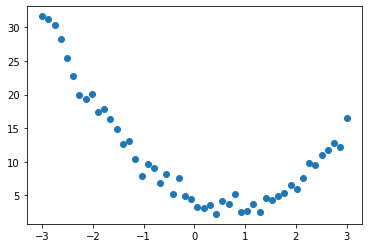

In [159]:
x = np.array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])
y = np.array([31.66815357, 31.26229494, 30.3467807 , 28.2057809 , 25.47674964,
       22.81398414, 19.93953021, 19.38250362, 20.02551935, 17.44468883,
       17.80733403, 16.29808282, 14.85006259, 12.69760597, 13.04075803,
       10.42420089,  7.91118094,  9.72737214,  9.05962483,  6.89984054,
        8.15068899,  5.15772899,  7.65448235,  4.95987628,  4.4284636 ,
        3.22183541,  3.05456124,  3.49253584,  2.23478284,  4.15163314,
        3.68063488,  5.22556445,  2.47139029,  2.66785497,  3.72557952,
        2.56255802,  4.61385762,  4.28234911,  4.91138639,  5.31724926,
        6.52053679,  5.94175001,  7.5368359 ,  9.78905172,  9.5795072 ,
       10.95610291, 11.73051576, 12.85008617, 12.2184079 , 16.52977769])
plt.scatter(x,y)

A polynomial estimator of degree 2 seems more appropriate in this case

In [160]:
# define the function f of degree two with parameters (a,b,c)
def f(x,a,b,c):
    return a*x**2 + b*x + c

You need to find the best params (a,b,c). We could again reuse `optimize.minimize` method to minimize the mean square error between our estimator $f$ and our scatter plot...

Fortunately, the handy method [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) does just that in one line

In [161]:
# Try it out
optimize.curve_fit(f, x, y)

(array([ 2.17083046, -3.0087075 ,  4.31968534]),
 array([[ 2.83060958e-03,  5.70112271e-12, -8.83843408e-03],
        [ 5.70112271e-12,  7.06225905e-03, -7.15333106e-11],
        [-8.83843408e-03, -7.15333106e-11,  4.96491035e-02]]))

The first array contains coefs that have been computed to minimize square errors between $f$ and the dataset  .
The second array contains the matrix of covariance.

❓Plot your quadratic estimator on top of the scatter plot to check that it fits!

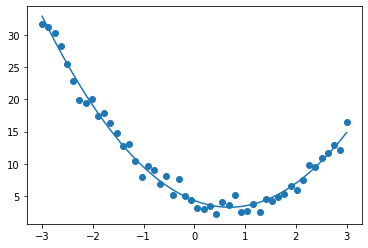

In [167]:
plt.scatter(x,y)
f_range = np.linspace(-3, 3, 100)
f_y = [f(x,  2.17083046, -3.0087075, 4.31968534) for x in f_range]
f_y
plt.plot(f_range, f_y)

## 3. Interpolate

As with any spreadsheet softwares, we often want to quickly fill the blanks in a series of datapoint. We'll use [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html)

In [169]:
from scipy import interpolate

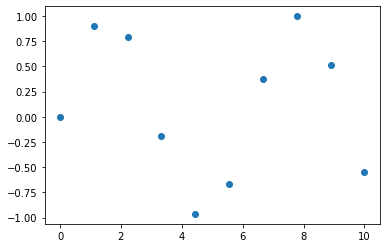

In [181]:
# Let's consider the following scatterplot
x = np.linspace(0, 10, 10)
y = np.array([0.,  0.8961922,  0.79522006, -0.19056796, -0.96431712,
              -0.66510151,  0.37415123,  0.99709789,  0.51060568, -0.54402111])
plt.scatter(x, y)

We can use the `interpolate.interp1d()` method to create a continuous function for any value $x$ in this range

In [187]:
f_interpolated = interpolate.interp1d(x,y, kind='quadratic')
f_interpolated

You can now call your interpolated function with any continuous values for $x$ in the initial range. Vizualize it with a new plot and a denser `linspace`for x. Feel free to try other `kind` of interpolations such as `quadratic` or `cubic`

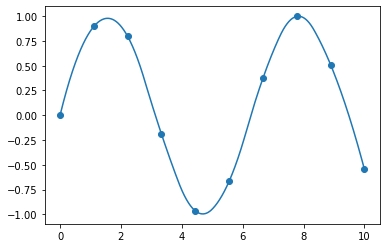

In [188]:
plt.scatter(x, y)
plot_range = np.linspace(0, 10, 1000)
f_range = [f_interpolated(x) for x in plot_range]
plt.plot(plot_range, f_range)